# Part 1

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_lower_and_upper_bounds(df, col, k=1.5):
    '''
    Takes in a df and a column names and return the lower fence and upper fence with a k of 1.5
    '''
    # first quartile
    q1 = df[col].quantile(.25)
    
    # second quartile
    q3 = df[col].quantile(.75)
    
    # calculate the iqr
    iqr = (q3 - q1)
    
    # get the upper fence
    upper_fence = q3 + (k * iqr)
    
    # get the lower fence
    lower_fence = q1 - (k * iqr)
    
    # exit and return the upper and lower fence
    return lower_fence, upper_fence
    

In [5]:
# get data
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [7]:
# checking
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [11]:
# lets begin
for col in df.select_dtypes(include=[int, float]):
    print(col, get_lower_and_upper_bounds(df, col, k=1.5))

Temperature (16.700000000000003, 104.7)
Rainfall (0.26, 1.3)
Flyers (4.0, 76.0)
Price (0.5, 0.5)
Sales (5.0, 45.0)


> * Temperature, and sales makes sense
> * Prices makes sense but its not useful becasue the price wiull always be the same
> * For flyers, it could make sense in a way, but mostly for data entry issues or to find anomalies
> * Rainfall doesnt make sense becasue negative rainfall will never happen so it is not useful to have a lower fence

In [14]:
# checking price values
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

>* All should be kept exceopt price (unless the price changes)

#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [16]:
for col in df.select_dtypes(include=[int, float]):
    print(col, get_lower_and_upper_bounds(df, col, k=3))

Temperature (-16.299999999999997, 137.7)
Rainfall (-0.13, 1.69)
Flyers (-23.0, 103.0)
Price (0.5, 0.5)
Sales (-10.0, 60.0)


In [21]:
for col in df.select_dtypes(exclude=object):
    print(col, get_lower_and_upper_bounds(df, col, k=3))

Temperature (-16.299999999999997, 137.7)
Rainfall (-0.13, 1.69)
Flyers (-23.0, 103.0)
Price (0.5, 0.5)
Sales (-10.0, 60.0)


>* Rainfall and flyers doesnt make sense really
>* Sales could make sense if they made 10 dollars worth of lemondae and didnt sell any of it - its situational
>* Temperature is ok

#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

> All the upper outliers make sense to meeeee
> price once again is strange

# Part 2

#### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

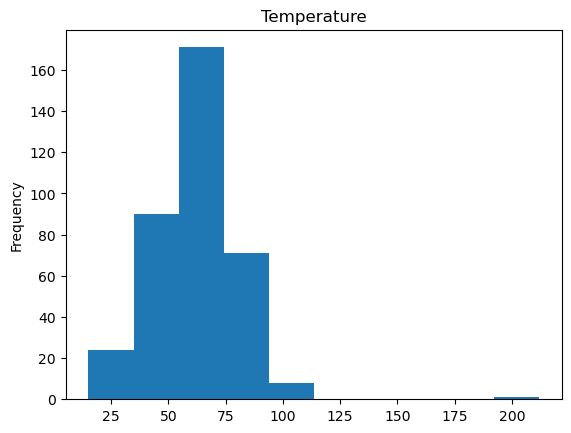

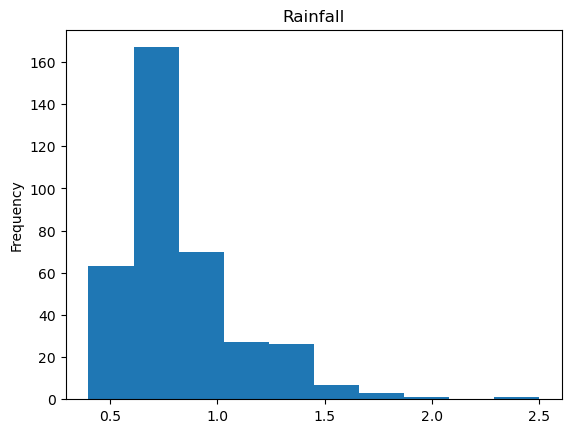

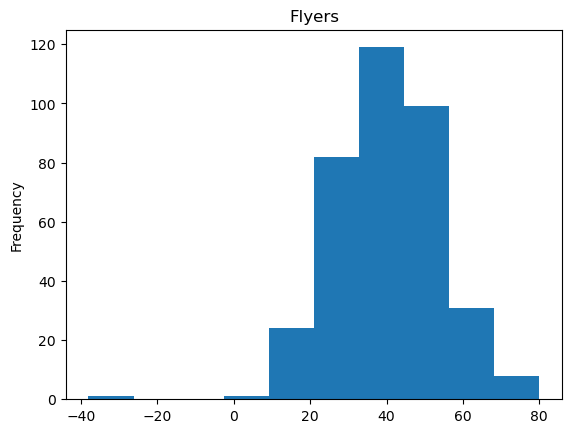

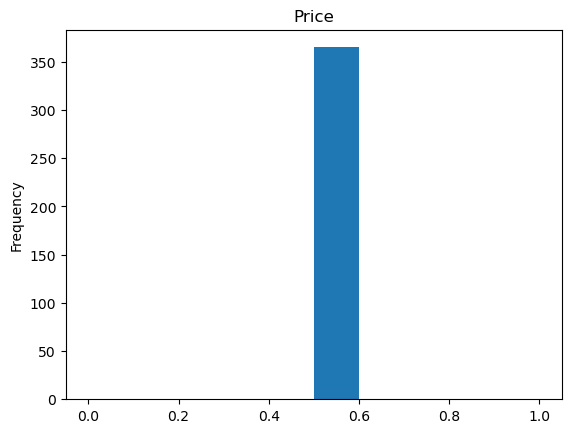

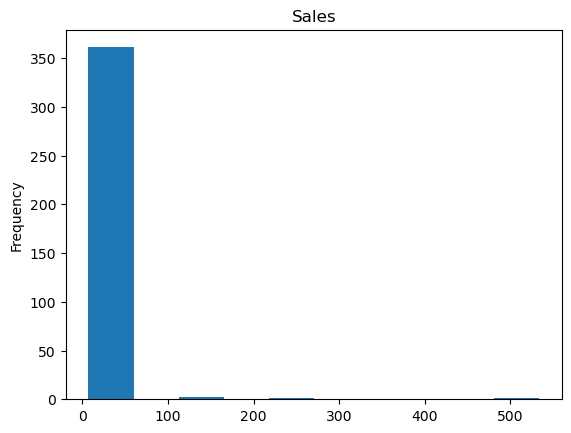

In [28]:
for col in df.select_dtypes(exclude=object):
    df[col].plot.hist()
    plt.title(f"{col}")
    plt.show()

>* Normal: Temp, Rain - Rightskewed, Flyers

#### Use a 2 sigma decision rule to isolate the outliers.

In [29]:
# getting norm cols
norm = df[['Temperature', 'Rainfall', 'Flyers']]

In [32]:
# geting z scores and norm cols
for col in norm:
    z = (df[col] - df[col].mean())/df[col].std()
    print(f'{col.upper()}')
    print(df[(z > 2)|(z < -2)])
    print('\n============\n')

TEMPERATURE
         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41    2/11/17  Saturday        212.0      0.91      35    0.5     21
166   6/16/17    Friday         99.3      0.47      77    0.5     41
176   6/26/17    Monday        102.6      0.47      60    0.5     42
181    7/1/17  Saturday        102.9      0.47      59    0.5    143
190   7/10/17    Monday         98.0      0.49      66    0.5     40
198   7/18/17   Tuesday         99.3      0.47      76    0.5     41
202   7/22/17  Saturday         99.6      0.47      49    0.5     42
207   7/27/17  Thursday         97.9      0.47      74    0.5     43
338   12/5/17   Tuesday         22.0      1.82      11    0.5     10
364  12/31/17    Sunday         15.1      2.50       9    0.5      7


RAINFALL
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1

#### Do these make sense?
Should certain outliers be kept or removed?
> * Temp: remove the 212
> * Rainfall: good
> * Flyers: remove the -38

In [33]:
# geting z scores and norm cols
for col in norm:
    z = (df[col] - df[col].mean())/df[col].std()
    print(f'{col.upper()}')
    print(df[(z > 3)|(z < -3)])
    print('\n============\n')

TEMPERATURE
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21


RAINFALL
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
15    1/16/17   Monday         30.6      1.67      24    0.5     12
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7


FLYERS
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20


